In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Optional, Union
import warnings
warnings.filterwarnings('ignore')

class DataAnalyzer:
    """데이터 분석을 위한 클래스"""
    
    def __init__(self, df: pd.DataFrame):
        """
        Args:
            df: 분석할 데이터프레임
        """
        self.df = df
        self.shape = df.shape
        
    def check_basic_info(self) -> None:
        """기본 정보 출력 (shape, dtypes, info)"""
        print("=== 데이터 기본 정보 ===")
        print(f"데이터 크기: {self.shape}")
        print("\n=== 데이터 타입 ===")
        print(self.df.dtypes)
        print("\n=== 데이터 정보 ===")
        print(self.df.info())
        
    def check_missing_values(self) -> pd.DataFrame:
        """결측치 확인"""
        missing_values = self.df.isnull().sum()
        missing_ratio = (missing_values / len(self.df)) * 100
        
        missing_df = pd.DataFrame({
            '결측치 수': missing_values,
            '결측치 비율(%)': missing_ratio.round(2)
        })
        
        # 결측치가 있는 컬럼만 출력
        missing_df = missing_df[missing_df['결측치 수'] > 0]
        
        if len(missing_df) == 0:
            print("결측치가 없습니다.")
        else:
            print("=== 결측치 현황 ===")
            print(missing_df)
            
        return missing_df
    
    def check_duplicates(self) -> None:
        """중복 데이터 확인"""
        n_duplicates = self.df.duplicated().sum()
        print(f"중복 데이터 수: {n_duplicates}")
        if n_duplicates > 0:
            print("\n=== 중복 데이터 샘플 ===")
            print(self.df[self.df.duplicated(keep=False)].head())
            
    def get_text_statistics(self, columns: List[str]) -> pd.DataFrame:
        """텍스트 데이터 통계 확인
        
        Args:
            columns: 분석할 텍스트 컬럼명 리스트
        """
        stats = []
        for col in columns:
            if col in self.df.columns:
                lengths = self.df[col].str.len()
                stats.append({
                    '컬럼명': col,
                    '평균 길이': lengths.mean(),
                    '표준편차': lengths.std(),
                    '최소 길이': lengths.min(),
                    '최대 길이': lengths.max(),
                    '중앙값': lengths.median()
                })
        
        stats_df = pd.DataFrame(stats).round(2)
        print("=== 텍스트 길이 통계 ===")
        print(stats_df)
        return stats_df
    
    def plot_text_length_distribution(self, columns: List[str], bins: int = 50) -> None:
        """텍스트 길이 분포 시각화
        
        Args:
            columns: 분석할 텍스트 컬럼명 리스트
            bins: 히스토그램 구간 수
        """
        n_cols = len(columns)
        fig, axes = plt.subplots(1, n_cols, figsize=(6*n_cols, 5))
        if n_cols == 1:
            axes = [axes]
            
        for ax, col in zip(axes, columns):
            if col in self.df.columns:
                lengths = self.df[col].str.len()
                sns.histplot(data=lengths, bins=bins, ax=ax)
                ax.set_title(f'{col} 길이 분포')
                ax.set_xlabel('텍스트 길이')
                ax.set_ylabel('빈도')
                
        plt.tight_layout()
        plt.show()
        
    def analyze_all(self, text_columns: Optional[List[str]] = None) -> None:
        """모든 분석 수행
        
        Args:
            text_columns: 분석할 텍스트 컬럼명 리스트 (선택사항)
        """
        print("="*50)
        self.check_basic_info()
        
        print("\n" + "="*50)
        self.check_missing_values()
        
        print("\n" + "="*50)
        self.check_duplicates()
        
        if text_columns:
            print("\n" + "="*50)
            self.get_text_statistics(text_columns)
            self.plot_text_length_distribution(text_columns)


=== Train 데이터 분석 ===
=== 데이터 기본 정보 ===
데이터 크기: (12457, 4)

=== 데이터 타입 ===
fname       object
dialogue    object
summary     object
topic       object
dtype: object

=== 데이터 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fname     12457 non-null  object
 1   dialogue  12457 non-null  object
 2   summary   12457 non-null  object
 3   topic     12457 non-null  object
dtypes: object(4)
memory usage: 389.4+ KB
None

결측치가 없습니다.

중복 데이터 수: 0

=== 텍스트 길이 통계 ===
        컬럼명   평균 길이    표준편차  최소 길이  최대 길이    중앙값
0  dialogue  438.77  220.13     99   2546  396.0
1   summary   87.40   37.64     19    478   80.0


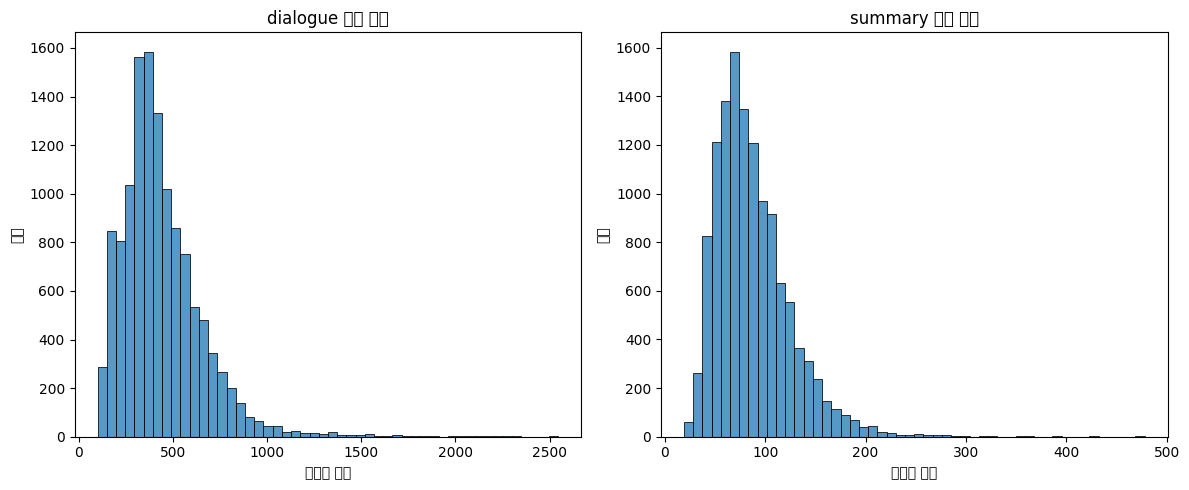


=== Validation 데이터 분석 ===
=== 데이터 기본 정보 ===
데이터 크기: (499, 4)

=== 데이터 타입 ===
fname       object
dialogue    object
summary     object
topic       object
dtype: object

=== 데이터 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fname     499 non-null    object
 1   dialogue  499 non-null    object
 2   summary   499 non-null    object
 3   topic     499 non-null    object
dtypes: object(4)
memory usage: 15.7+ KB
None

결측치가 없습니다.

중복 데이터 수: 0

=== 텍스트 길이 통계 ===
        컬럼명   평균 길이    표준편차  최소 길이  최대 길이    중앙값
0  dialogue  432.56  206.07    132   1484  392.0
1   summary   81.71   35.88     25    263   74.0


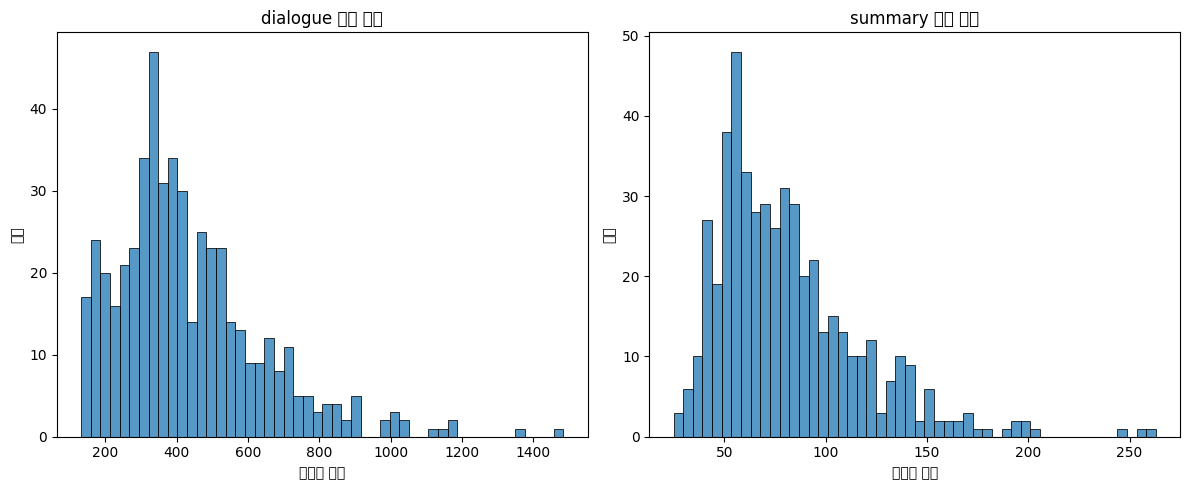


=== Test 데이터 분석 ===
=== 데이터 기본 정보 ===
데이터 크기: (499, 2)

=== 데이터 타입 ===
fname       object
dialogue    object
dtype: object

=== 데이터 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fname     499 non-null    object
 1   dialogue  499 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB
None

결측치가 없습니다.

중복 데이터 수: 0

=== 텍스트 길이 통계 ===
        컬럼명   평균 길이    표준편차  최소 길이  최대 길이    중앙값
0  dialogue  449.31  239.19    109   2650  407.0


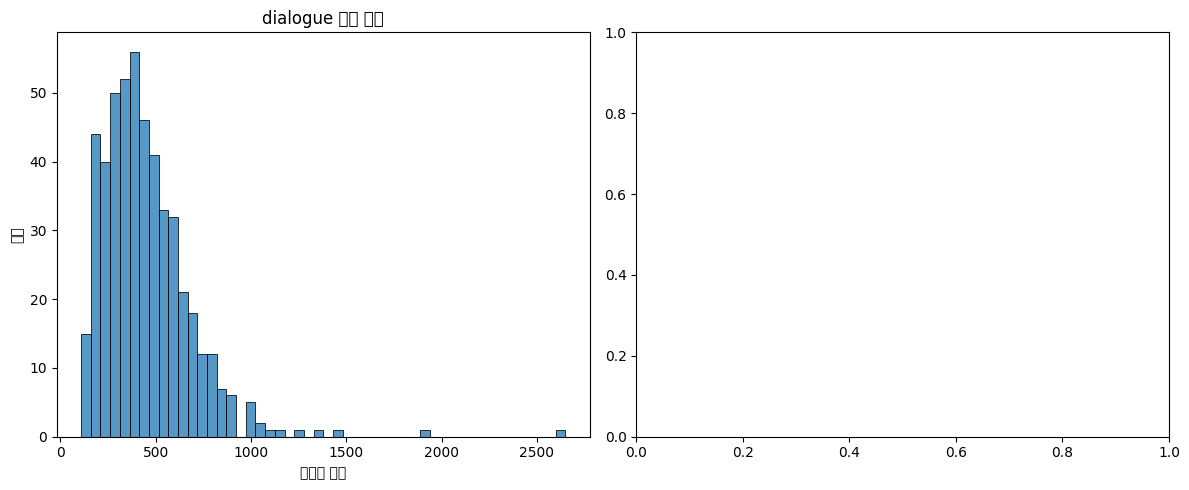

In [2]:
import os
os.chdir("../")
# 데이터 로드
train_df = pd.read_csv("data/train.csv")
val_df = pd.read_csv("data/dev.csv")
test_df = pd.read_csv("data/test.csv")

# 분석할 텍스트 컬럼
text_columns = ['dialogue', 'summary']

print("=== Train 데이터 분석 ===")
train_analyzer = DataAnalyzer(train_df)
train_analyzer.analyze_all(text_columns)

print("\n=== Validation 데이터 분석 ===")
val_analyzer = DataAnalyzer(val_df)
val_analyzer.analyze_all(text_columns)

print("\n=== Test 데이터 분석 ===")
test_analyzer = DataAnalyzer(test_df)
test_analyzer.analyze_all(text_columns)